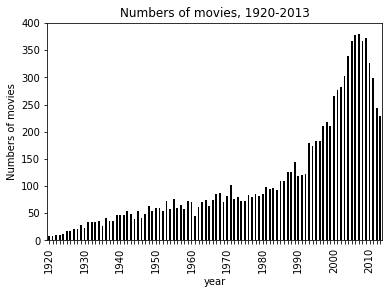

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import seaborn as sns
from data_gen import gen_df

def fig3_J():
    # Importing data and making new dataframe
    filename = 'imdb.csv'
    df = gen_df(filename)
    imdb = df.copy()
    
    # Generate variable that counts number of observation/movies in each year
    imdb['temp']=1
    imdb['tot_film'] = imdb.groupby('year')['temp'].transform(lambda x : x.sum())
    del imdb['temp']

    # Make new dataframe that only take one value per year. 
    # The dataframe only contain the year indicator and number of movies in the given year
    y=pd.DataFrame(imdb.groupby('year')['tot_film'].first())
    y.reset_index(inplace=True)
    
    # Plotting the number of movies per year
    ax1 = y.plot(x='year', y = 'tot_film', color='black', kind='bar', legend=False)
    ax1.set_ylabel('Numbers of movies')
    ax1.set_title(f'Numbers of movies, 1920-2013')
    ax1.set_ylim([0,400])
    
    # Set labels, so every n'th (here 10) label is shown
    n = 10  
    [l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0];
    

fig3_J()

